In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [32]:
df = pd.read_csv('wine.csv', names = ['Class','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols'
                                     ,'Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline'])
df

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
##14,15 พิจารณาว่าควรทำ Normalization หรือ Standardization หรือไม่ควร พร้อมให้เหตุผล  --> ควรทำ Normalization เพื่อปรับweightของfeature  
## เพราะ แต่ละfeatureขนาดของข้อมูลแตกต่างกัน และไม่ควรใช้ standardization เพราะว่าข้อมูลไม่ใช่normal distribution

In [4]:
# normalization
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
df_minmax = min_max_scaler.fit_transform(df.drop(['Class'],axis=1))

In [5]:
df_minmax

array([[0.84210526, 0.1916996 , 0.57219251, ..., 0.45528455, 0.97069597,
        0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, ..., 0.44715447, 0.6959707 ,
        0.64693295],
       ...,
       [0.58947368, 0.69960474, 0.48128342, ..., 0.08943089, 0.10622711,
        0.39728959],
       [0.56315789, 0.36561265, 0.54010695, ..., 0.09756098, 0.12820513,
        0.40085592],
       [0.81578947, 0.66403162, 0.73796791, ..., 0.10569106, 0.12087912,
        0.20114123]])

In [7]:
new_df = pd.DataFrame(df_minmax, columns=df.columns[1:])
new_df

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


In [8]:
#12 สร้าง train/test split ของข้อมูล สามารถลองทดสอบ 70:30, 80:20, 90:10 ratio ได้ตามใจ
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_df, df['Class'], test_size=0.3, random_state=80)

In [9]:
# Model training
from sklearn.neighbors import KNeighborsClassifier

In [10]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [12]:
predicted = knn.predict(X_test)

In [13]:
#16 วัดผลโมเดล โดยใช้ confusion matrix และ ประเมินผลด้วยคะแนน Accuracy, F1 score, Recall, Precision
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
print('Accuracy = ', accuracy_score(y_test, predicted))
print('F1 score = ', f1_score(y_test, predicted, average = 'micro'))
print('Recall = ', recall_score(y_test, predicted, average = 'micro'))
print('Precision = ', precision_score(y_test, predicted, average = 'micro'))

Accuracy =  0.9444444444444444
F1 score =  0.9444444444444444
Recall =  0.9444444444444444
Precision =  0.9444444444444444


In [16]:
#17 หาค่า K ที่ดีที่สุด สำหรับ Dataset นี้
accuracy_lst = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predicted_i = knn.predict(X_test)
    accuracy_lst.append(accuracy_score(y_test,predicted_i))
    

In [18]:
print(accuracy_lst)

[0.9444444444444444, 0.9629629629629629, 0.9629629629629629, 0.9814814814814815, 0.9814814814814815, 1.0, 0.9814814814814815, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9814814814814815, 1.0, 1.0, 1.0, 0.9629629629629629, 0.9814814814814815, 0.9814814814814815, 1.0, 0.9814814814814815, 0.9814814814814815, 1.0, 0.9814814814814815, 0.9814814814814815, 0.9814814814814815, 0.9814814814814815, 0.9814814814814815, 0.9814814814814815, 0.9814814814814815, 0.9814814814814815, 0.9814814814814815, 0.9814814814814815, 0.9814814814814815, 0.9814814814814815, 0.9814814814814815, 0.9814814814814815, 0.9814814814814815, 0.9814814814814815, 0.9814814814814815, 0.9814814814814815, 0.9814814814814815, 0.9814814814814815]


In [23]:
df_K = pd.DataFrame(accuracy_lst, index =[i for i in range(1,50)], columns =['accuracy'])
df_K

,accuracy
1,0.944444
2,0.962963
3,0.962963
4,0.981481
5,0.981481
6,1.000000
7,0.981481
8,1.000000
9,1.000000
10,1.000000


Text(0.5, 1.0, 'Using all available features')

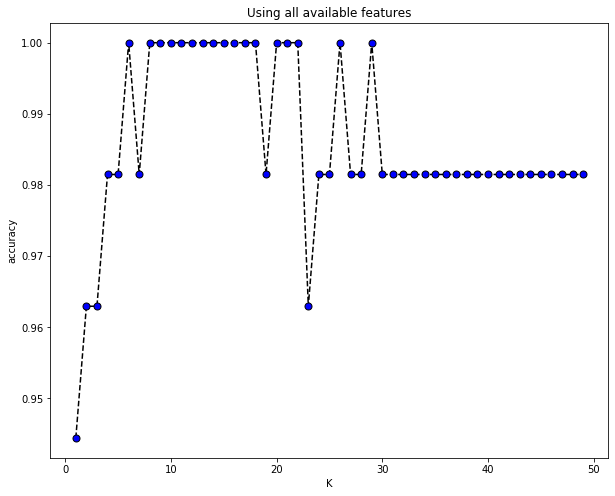

In [49]:
#19 ทำ Visualization ของค่า K ค่าต่างๆ
plt.figure(figsize=(10,8))
plt.plot(range(1,50), accuracy_lst, color='black', linestyle='dashed',marker='o', 
        markerfacecolor='blue',markersize=7)
plt.xlabel('K')
plt.ylabel('accuracy')
plt.title('Using all available features')

In [36]:
df[['Flavanoids','Total phenols','OD280/OD315 of diluted wines']]

,Flavanoids,Total phenols,OD280/OD315 of diluted wines
0,3.06,2.80,3.92
1,2.76,2.65,3.40
2,3.24,2.80,3.17
3,3.49,3.85,3.45
4,2.69,2.80,2.93
...,...,...,...
173,0.61,1.68,1.74
174,0.75,1.80,1.56
175,0.69,1.59,1.56
176,0.68,1.65,1.62


In [37]:
#18 เลือกเฉพาะ features ที่สนใจมาเทรนโมเดล และวัดผลเปรียบเทียบกับแบบ all-features
df2_minmax = min_max_scaler.fit_transform(df[['Flavanoids','Total phenols','OD280/OD315 of diluted wines']])

new_df2= pd.DataFrame(df2_minmax, columns=['Flavanoids','Total phenols','OD280/OD315 of diluted wines'])
new_df2

,Flavanoids,Total phenols,OD280/OD315 of diluted wines
0,0.573840,0.627586,0.970696
1,0.510549,0.575862,0.780220
2,0.611814,0.627586,0.695971
3,0.664557,0.989655,0.798535
4,0.495781,0.627586,0.608059
...,...,...,...
173,0.056962,0.241379,0.172161
174,0.086498,0.282759,0.106227
175,0.073840,0.210345,0.106227
176,0.071730,0.231034,0.128205


In [40]:
X2_train, X2_test, y_train, y_test = train_test_split(new_df2, df['Class'], test_size=0.3, random_state=80)

In [42]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X2_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [43]:
predicted2 = knn.predict(X2_test)
predicted2

array([2, 1, 1, 2, 3, 3, 1, 1, 3, 2, 2, 1, 1, 2, 3, 2, 1, 2, 1, 1, 3, 2,
       3, 3, 1, 2, 2, 1, 2, 1, 3, 3, 2, 2, 3, 2, 1, 2, 2, 1, 3, 1, 1, 1,
       2, 2, 3, 2, 1, 1, 3, 3, 1, 2], dtype=int64)

In [44]:
print('Accuracy = ', accuracy_score(y_test, predicted2))
print('F1 score = ', f1_score(y_test, predicted2, average = 'micro'))
print('Recall = ', recall_score(y_test, predicted2, average = 'micro'))
print('Precision = ', precision_score(y_test, predicted2, average = 'micro'))

Accuracy =  0.6481481481481481
F1 score =  0.6481481481481481
Recall =  0.6481481481481481
Precision =  0.6481481481481481


In [45]:
# หาค่า K ที่ดีที่สุด สำหรับ Dataset ใหม่
accuracy_lst2 = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X2_train,y_train)
    predicted2_i = knn.predict(X2_test)
    accuracy_lst2.append(accuracy_score(y_test,predicted2_i))
    

In [47]:
df2_K = pd.DataFrame(accuracy_lst2, index =[i for i in range(1,50)], columns =['accuracy'])
df2_K

,accuracy
1,0.648148
2,0.685185
3,0.648148
4,0.740741
5,0.759259
6,0.777778
7,0.777778
8,0.814815
9,0.777778
10,0.833333


Text(0.5, 1.0, 'Using some features')

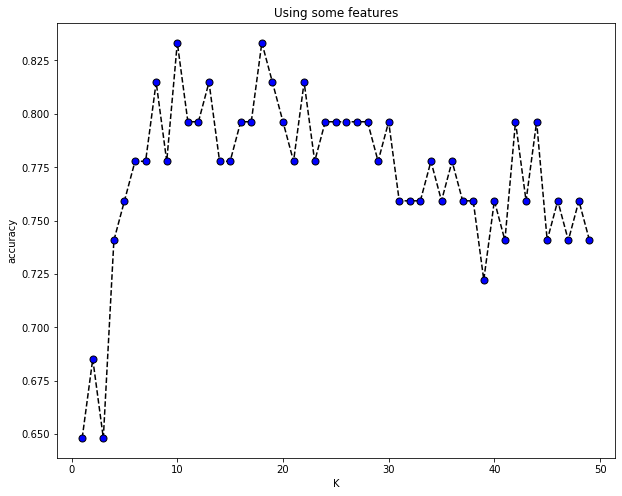

In [48]:
# Visualization ของค่า K ค่าต่างๆ
plt.figure(figsize=(10,8))
plt.plot(range(1,50), accuracy_lst2, color='black', linestyle='dashed',marker='o', 
        markerfacecolor='blue',markersize=7)
plt.xlabel('K')
plt.ylabel('accuracy')
plt.title('Using some features')

In [50]:
###Summary : ใช้ all feature ได้ผลลัพธ์(accuracy)ดีกว่าใช้บาง feature